In [1]:
import yfinance as yf
from src.TimeSeries import TimeSeries
from src.TimeSeriesPlot import TimeSeriesPlot
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

In [2]:
# Descargar precios de MELI
meli = yf.download('MELI', start='2021-01-01')
dates = meli.index
meli_prices = meli['Close']['MELI']
meli_high = meli['High']['MELI']
meli_low = meli['Low']['MELI']
meli_open = meli['Open']['MELI']

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:
ts = TimeSeries('$MELI', dates, meli_prices, meli_open, meli_high, meli_low)

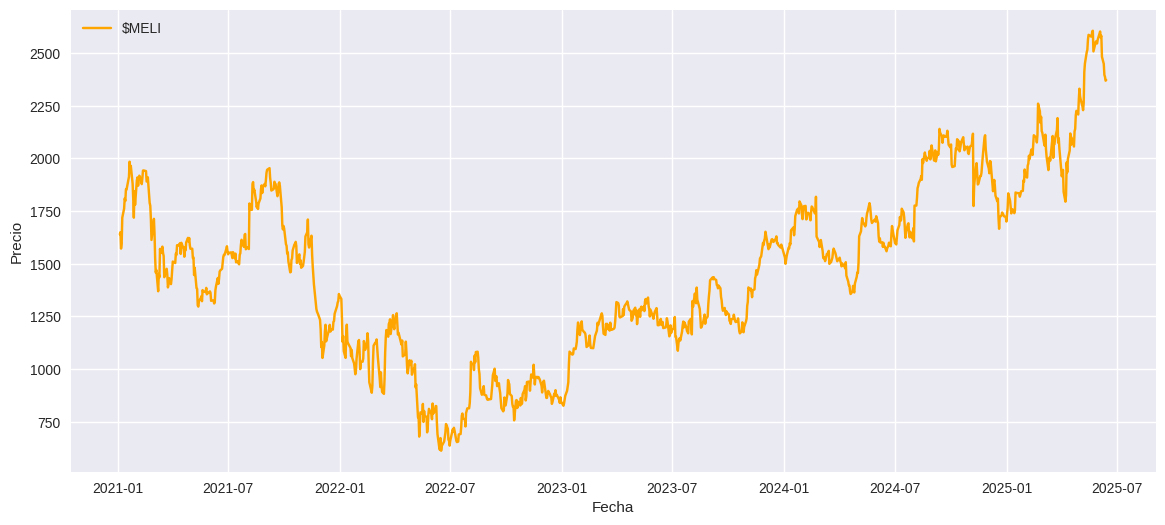

In [4]:
plot = TimeSeriesPlot(ts)
plot.add_original()
plot.add_grid()
plot.show()

In [5]:
ts.is_stationary()

ADF Statistic: -1.026696283902708
p-value: 0.743403358870083

KPSS Statistic: 1.0658520399207754
p-value: 0.01

Decisión: No estacionaria


False

In [6]:
ts_estacionaria = ts.detrend_with_differencing(1)
ts_estacionaria.is_stationary()

ADF Statistic: -33.279135803446444
p-value: 0.0

KPSS Statistic: 0.02253169804627554
p-value: 0.1

Decisión: Estacionaria


True

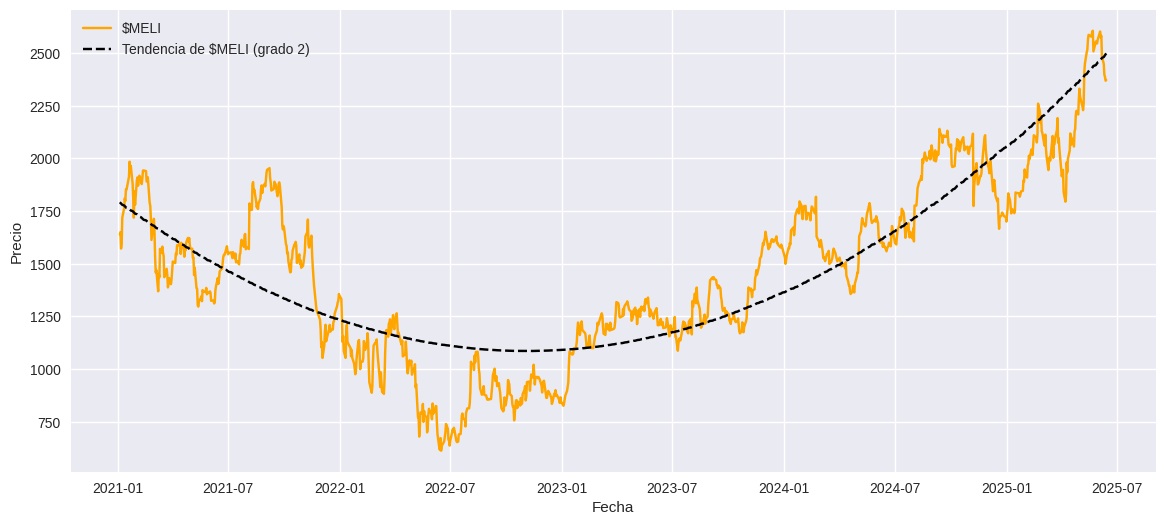

In [7]:
grado_de_tendencia = 2

plot = TimeSeriesPlot(ts)
plot.add_original()
plot.add_tendency(grado_de_tendencia)
plot.add_grid()
plot.show()

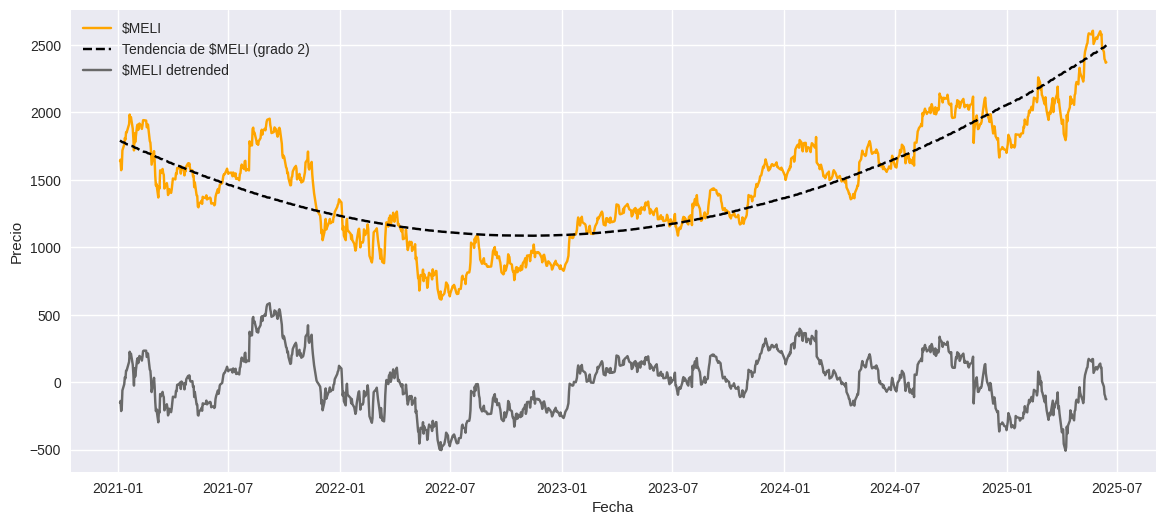

In [8]:
plot = TimeSeriesPlot(ts)
plot.add_original()
plot.add_tendency(grado_de_tendencia)
plot.add_grid()
plot.add_detrended(grado_de_tendencia)
plot.show()

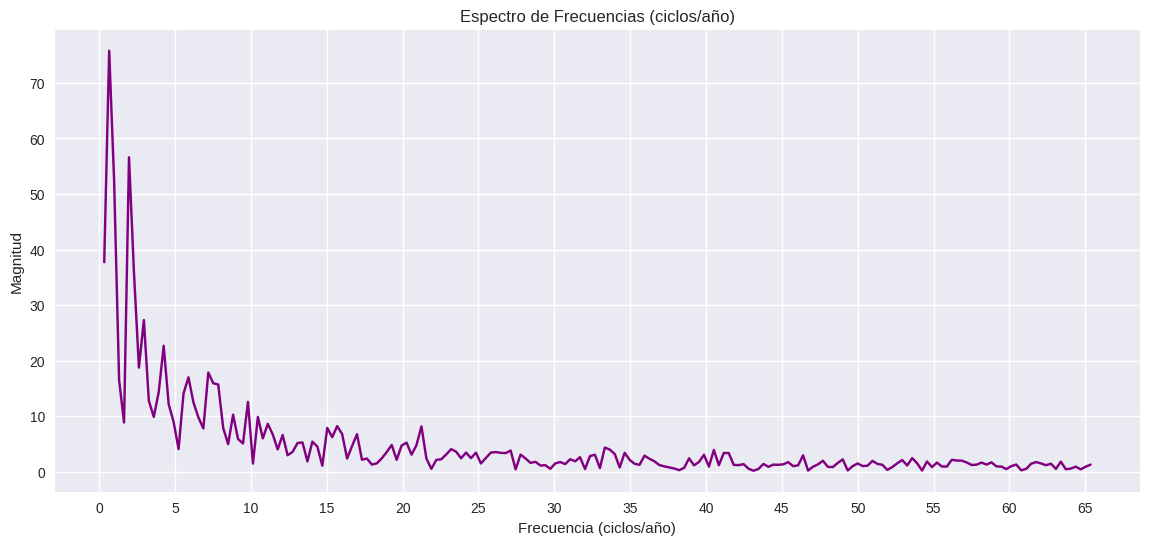

In [9]:
plot = TimeSeriesPlot(ts)
plot.add_yearly_frequency_spectrum(200, 5)
plot.show()

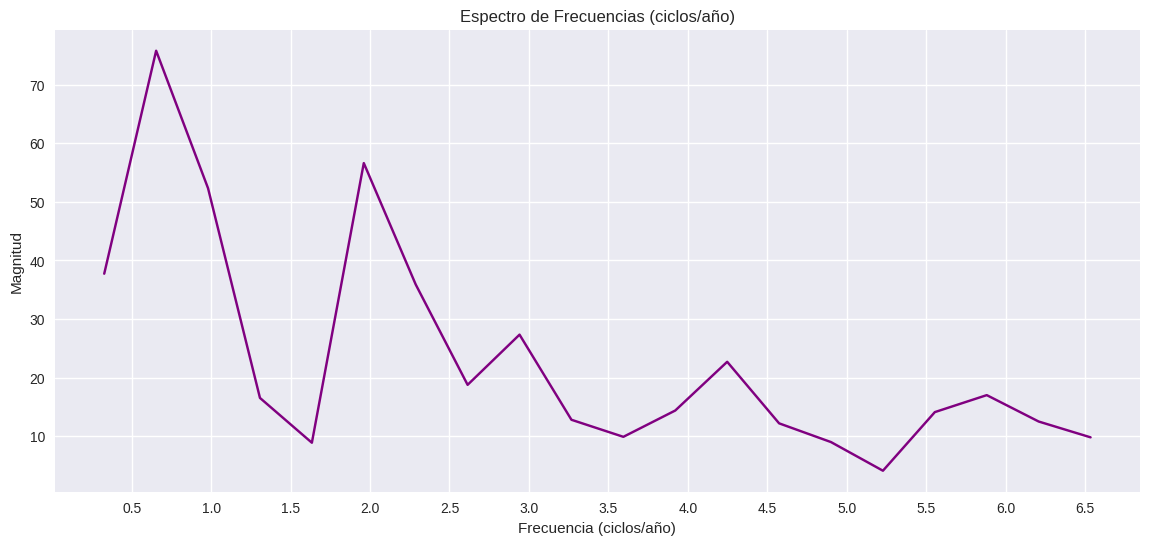

In [10]:
plot = TimeSeriesPlot(ts)
plot.add_yearly_frequency_spectrum(20, 0.5)
plot.show()

Aplicamos filtros pasa-bajos para ver picos de tendencias interesantes.

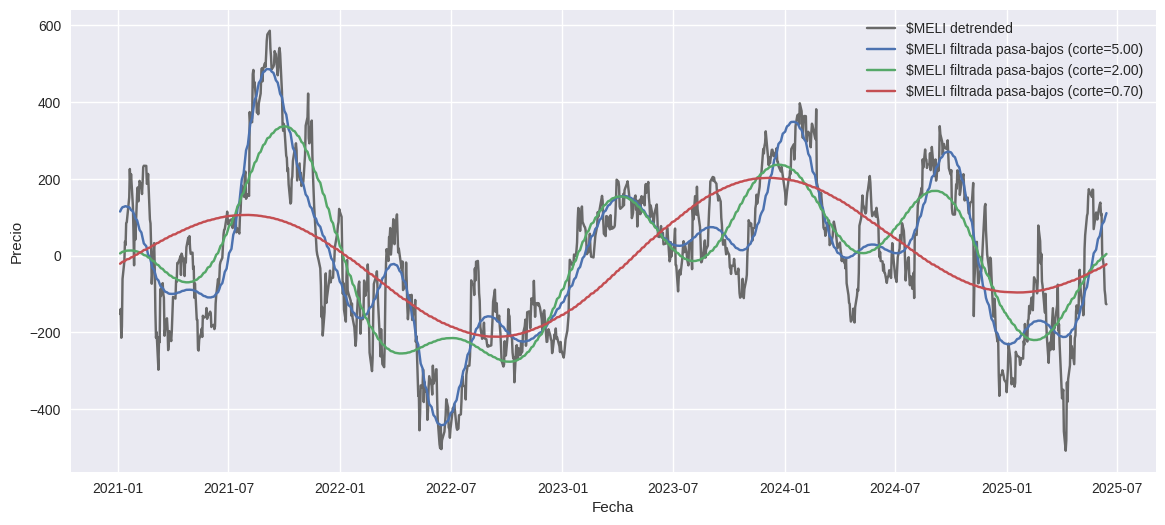

In [11]:
plot = TimeSeriesPlot(ts)
plot.add_detrended(grado_de_tendencia)
plot.add_low_pass_filtered(5)
plot.add_low_pass_filtered(2)
plot.add_low_pass_filtered(0.7)
plot.add_grid()
plot.show()

A partir de freq 25 parece ser principalmente ruido, filtramos las fluctuaciones de alta frecuencia:

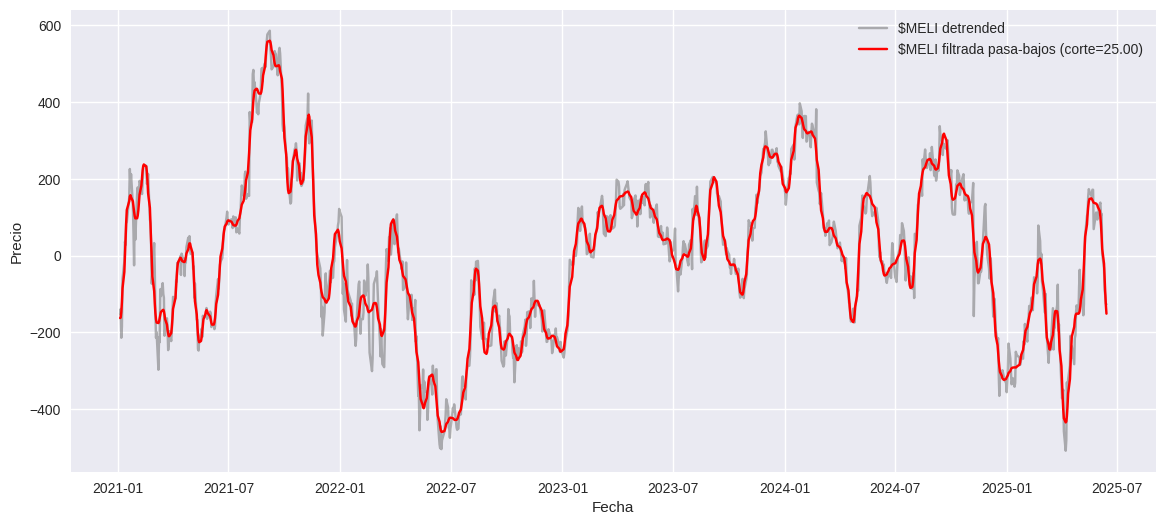

In [15]:
plot = TimeSeriesPlot(ts)
plot.add_detrended(grado_de_tendencia, alpha=0.5)
plot.add_low_pass_filtered(25, color='red')
plot.add_grid()
plot.show()

Y analizando con filtros pasa-bandas:

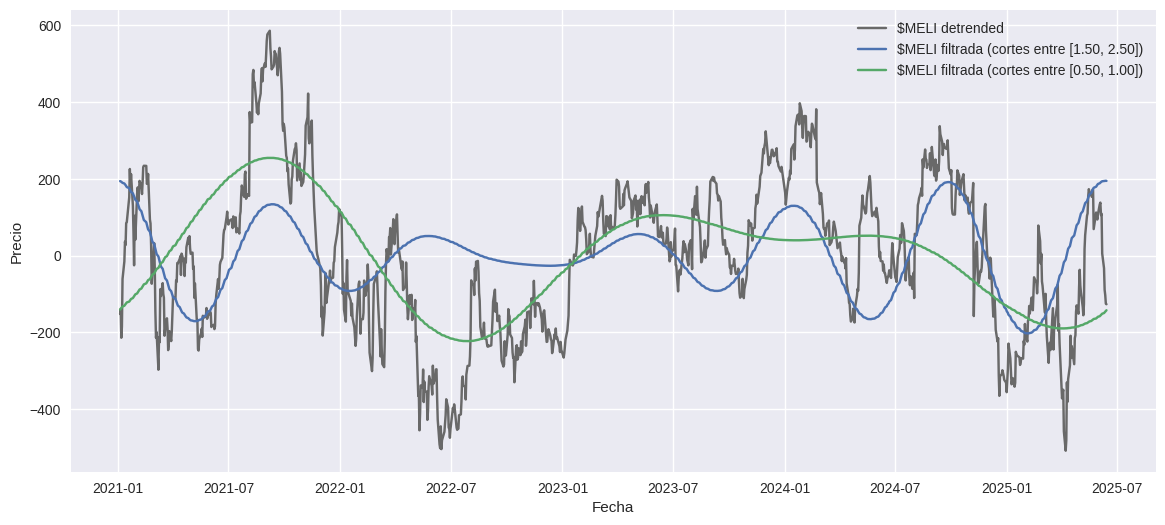

In [13]:
plot = TimeSeriesPlot(ts)
plot.add_detrended(grado_de_tendencia)
plot.add_band_pass_filtered(1.5, 2.5)
plot.add_band_pass_filtered(0.5, 1)
plot.add_grid()
plot.show()